In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
data = pd.read_csv("Amazon.csv")
data = data["Close"].values.reshape(-1,1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
train_data = scaled_data[:int(0.8*len(scaled_data))]
test_data = scaled_data[int(0.8*len(scaled_data)):]

In [ ]:
def create_sequences(data,seq_length):
  sequences = []
  for i in range(len(data) - seq_length):
    sequence = data[i:i+seq_length]
    sequences.append(sequence)
  return np.array(sequences)

seq_length = 10
X_train = create_sequences(train_data, seq_length)
y_train = train_data[seq_length:]
X_test = create_sequences(test_data, seq_length)
y_test = test_data[seq_length:]

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(seq_length, 1), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.SimpleRNN(64,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train,y_train,epochs=100,batch_size=16,validation_split=0.1,callbacks=[early_stopping])

Epoch 1/100
277/277 [==============================] - 12s 34ms/step - loss: 2.5234e-04 - val_loss: 2.3628e-04
Epoch 2/100
277/277 [==============================] - 8s 29ms/step - loss: 6.6119e-05 - val_loss: 7.3046e-05
Epoch 3/100
277/277 [==============================] - 9s 32ms/step - loss: 4.3200e-05 - val_loss: 4.6847e-05
Epoch 4/100
277/277 [==============================] - 9s 32ms/step - loss: 3.4209e-05 - val_loss: 1.3924e-04
Epoch 5/100
277/277 [==============================] - 8s 30ms/step - loss: 2.5546e-05 - val_loss: 3.9035e-05
Epoch 6/100
277/277 [==============================] - 9s 33ms/step - loss: 2.3181e-05 - val_loss: 7.2659e-05
Epoch 7/100
277/277 [==============================] - 9s 33ms/step - loss: 2.1781e-05 - val_loss: 2.1638e-04
Epoch 8/100
277/277 [==============================] - 10s 37ms/step - loss: 1.9407e-05 - val_loss: 4.6382e-05


In [ ]:
predictions = model.predict(X_test)

39/39 [==============================] - 1s 9ms/step


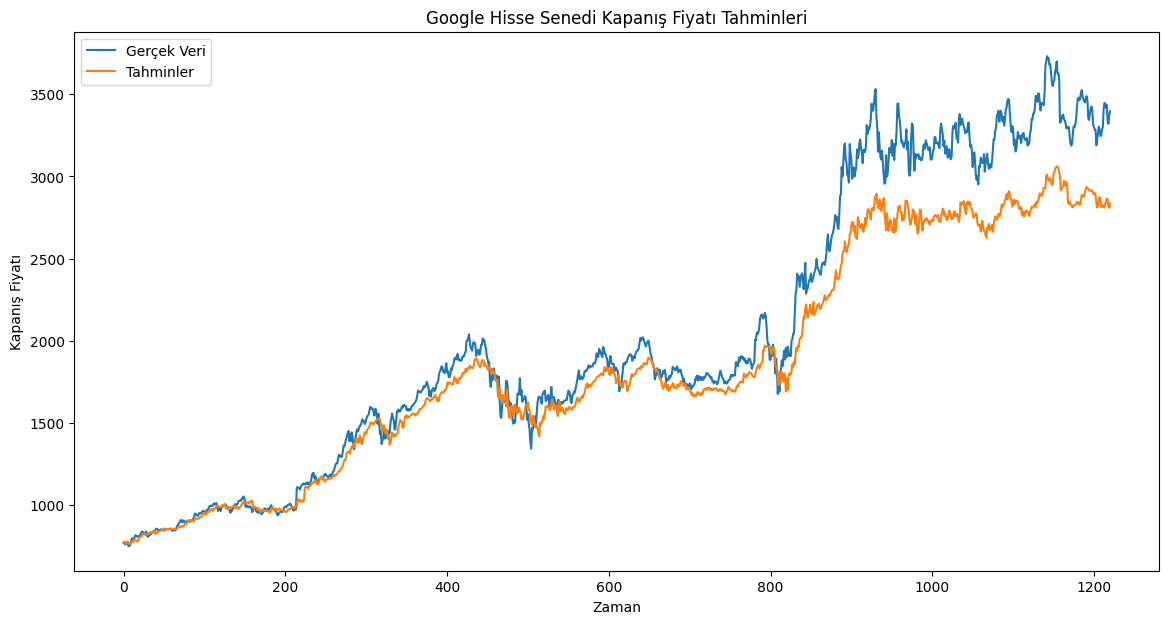

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(y_test), label='Gerçek Veri')
plt.plot(scaler.inverse_transform(predictions), label='Tahminler')
plt.title('Google Hisse Senedi Kapanış Fiyatı Tahminleri')
plt.xlabel('Zaman')
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.show()